In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/sagarvadher/KickstarterSuccessRatePredicton/master/ks-projects-201801.csv')

In [3]:
df.shape

(378661, 14)

In [5]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/15,1000.0,8/11/15 12:12,0.0,failed,0,GB,0.0,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/17,30000.0,9/2/17 04:43,2421.0,failed,15,US,100.0,2421.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/13,45000.0,1/12/13 00:20,220.0,failed,3,US,220.0,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/12,5000.0,3/17/12 03:24,1.0,failed,1,US,1.0,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/15,19500.0,7/4/15 08:35,1283.0,canceled,14,US,1283.0,1283.0


In [7]:
df['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [8]:
df['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [9]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
dtype: object

In [12]:
df['launched']=pd.to_datetime(df['launched'])


In [13]:
df['deadline'] = pd.to_datetime(df['deadline'])

In [14]:
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
dtype: object

In [15]:
df['realnotreal'] = df['usd pledged'] == df['usd_pledged_real']

In [16]:
df.realnotreal.value_counts()

True     262248
False    116413
Name: realnotreal, dtype: int64

In [20]:
df['Year'] = pd.DatetimeIndex(df['launched']).year

In [21]:
df.shape

(378661, 16)

In [22]:
year_unique, year_count =np.unique(df['Year'], return_counts=True)

In [23]:
year_unique

array([1970, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int32)

In [24]:
year_count

array([    7,  1329, 10519, 26237, 41165, 44851, 67745, 77300, 57184,
       52200,   124])

In [26]:
%matplotlib inline
x = year_unique[1:]
y=year_count[1:]
data = [go.Bar(x=x, y=y)]
py.iplot(data)

In [27]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [28]:
state = df.state.unique().tolist()


In [29]:
del state[state.index('live')]

In [30]:
data_bar =[]

In [31]:
df[pd.isnull(df['pledged'])]



,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year


In [32]:
df['usd pledged'].value_counts()

0.000000         68112
1.000000          5335
25.000000         3876
10.000000         3623
50.000000         3139
100.000000        2673
5.000000          2596
20.000000         2469
30.000000         1716
2.000000          1451
15.000000         1308
40.000000         1187
60.000000         1184
35.000000         1176
75.000000         1119
150.000000        1064
200.000000         988
125.000000         917
70.000000          790
55.000000          777
110.000000         773
45.000000          758
11.000000          735
80.000000          711
26.000000          703
120.000000         666
6.000000           662
250.000000         652
500.000000         618
300.000000         604
                 ...  
68496.100000         1
12.890950            1
10119.500000         1
214345.000000        1
1420.783966          1
13395.000000         1
6937.759071          1
618.178984           1
197.075253           1
459.577054           1
13393.000000         1
921.660000           1
107145.0000

In [33]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:00,0.0,failed,0,GB,0.0,0.0,True,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:00,2421.0,failed,15,US,100.0,2421.0,False,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:00,220.0,failed,3,US,220.0,220.0,True,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:00,1.0,failed,1,US,1.0,1.0,True,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:00,1283.0,canceled,14,US,1283.0,1283.0,True,2015


In [34]:
def hr_func(ts):
    return ts.year,ts.month,ts.day

df['launched_date'] = df['launched'].apply(hr_func)


In [35]:
df['launched_date']

0          (2015, 8, 11)
1           (2017, 9, 2)
2          (2013, 1, 12)
3          (2012, 3, 17)
4           (2015, 7, 4)
5          (2016, 2, 26)
6          (2014, 12, 1)
7           (2016, 2, 1)
8          (2014, 4, 24)
9          (2014, 7, 11)
10          (2013, 9, 9)
11          (2013, 3, 9)
12          (2014, 9, 2)
13          (2016, 2, 9)
14          (2017, 4, 5)
15         (2015, 1, 29)
16         (2014, 10, 9)
17         (2015, 4, 10)
18          (2012, 8, 2)
19          (2012, 5, 3)
20        (2013, 11, 25)
21          (2017, 8, 8)
22         (2014, 5, 16)
23         (2015, 1, 26)
24        (2014, 10, 23)
25         (2010, 12, 7)
26         (2015, 12, 6)
27        (2014, 11, 14)
28        (2015, 12, 29)
29          (2017, 4, 3)
               ...      
378631      (2014, 9, 3)
378632      (2014, 5, 6)
378633    (2014, 11, 13)
378634     (2010, 11, 8)
378635     (2015, 8, 25)
378636    (2014, 11, 17)
378637     (2017, 8, 29)
378638     (2014, 7, 15)
378639     (2015, 11, 3)


In [36]:
import datetime

In [37]:
df['launched_date'] = df['launched_date'].apply(lambda x: datetime.datetime.strptime(str(x), '(%Y, %m, %d)'))


In [38]:
df['launched_date']

0        2015-08-11
1        2017-09-02
2        2013-01-12
3        2012-03-17
4        2015-07-04
5        2016-02-26
6        2014-12-01
7        2016-02-01
8        2014-04-24
9        2014-07-11
10       2013-09-09
11       2013-03-09
12       2014-09-02
13       2016-02-09
14       2017-04-05
15       2015-01-29
16       2014-10-09
17       2015-04-10
18       2012-08-02
19       2012-05-03
20       2013-11-25
21       2017-08-08
22       2014-05-16
23       2015-01-26
24       2014-10-23
25       2010-12-07
26       2015-12-06
27       2014-11-14
28       2015-12-29
29       2017-04-03
            ...    
378631   2014-09-03
378632   2014-05-06
378633   2014-11-13
378634   2010-11-08
378635   2015-08-25
378636   2014-11-17
378637   2017-08-29
378638   2014-07-15
378639   2015-11-03
378640   2014-08-08
378641   2015-07-06
378642   2017-10-04
378643   2014-05-05
378644   2015-11-23
378645   2013-09-10
378646   2013-10-18
378647   2012-08-15
378648   2016-01-24
378649   2017-02-08


In [40]:
df['period']=df['deadline'].subtract(df['launched_date'])

In [41]:
df['period']

0        59 days
1        60 days
2        45 days
3        30 days
4        56 days
5        35 days
6        20 days
7        45 days
8        35 days
9        30 days
10       30 days
11       30 days
12       30 days
13       45 days
14       28 days
15       30 days
16       30 days
17       30 days
18       15 days
19       30 days
20       35 days
21       30 days
22       30 days
23       30 days
24       20 days
25       30 days
26       30 days
27       30 days
28       30 days
29       30 days
           ...  
378631   30 days
378632   30 days
378633   30 days
378634   61 days
378635   30 days
378636   30 days
378637   45 days
378638   31 days
378639   30 days
378640   34 days
378641   60 days
378642   27 days
378643   21 days
378644   22 days
378645   30 days
378646   43 days
378647   30 days
378648   30 days
378649   60 days
378650   38 days
378651   30 days
378652   30 days
378653   30 days
378654   30 days
378655   45 days
378656   30 days
378657   27 days
378658   46 da

In [42]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year,launched_date,period
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:00,0.0,failed,0,GB,0.0,0.0,True,2015,2015-08-11,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:00,2421.0,failed,15,US,100.0,2421.0,False,2017,2017-09-02,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:00,220.0,failed,3,US,220.0,220.0,True,2013,2013-01-12,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:00,1.0,failed,1,US,1.0,1.0,True,2012,2012-03-17,30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:00,1283.0,canceled,14,US,1283.0,1283.0,True,2015,2015-07-04,56 days


In [43]:
df['realnotreal'].value_counts()

True     262248
False    116413
Name: realnotreal, dtype: int64

In [44]:
df['real_less_then_pledged'] = df['usd_pledged_real']>df['usd pledged']

In [45]:
df['real_less_then_pledged']

0         False
1          True
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14         True
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23         True
24        False
25        False
26        False
27        False
28        False
29         True
          ...  
378631    False
378632    False
378633    False
378634    False
378635    False
378636    False
378637     True
378638    False
378639    False
378640    False
378641    False
378642     True
378643    False
378644    False
378645     True
378646    False
378647    False
378648    False
378649     True
378650    False
378651    False
378652     True
378653    False
378654     True
378655    False
378656    False
378657    False
378658    False
378659    False
378660    False
Name: real_less_then_ple

In [46]:
df.real_less_then_pledged.value_counts()

False    292578
True      86083
Name: real_less_then_pledged, dtype: int64

In [47]:
df[(df.state == 'successful') & (df.real_less_then_pledged == True)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year,launched_date,period,real_less_then_pledged
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:00,94175.00,successful,761,GB,57763.779680,121857.329600,False,2017,2017-04-05,28 days,True
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:00,57577.31,successful,840,US,10120.000000,57577.310000,False,2017,2017-04-03,30 days,True
31,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:00,47266.00,successful,549,US,11253.000000,47266.000000,False,2016,2016-09-07,31 days,True
41,1000153208,Phil Younger - Slow Down (Official Music Video),Music,Music,USD,2016-12-20,2100.0,2016-12-09 20:27:00,2100.00,successful,34,US,83.000000,2100.000000,False,2016,2016-12-09,11 days,True
85,1000335422,"""Where is Home?"" Anthology",Anthologies,Comics,CAD,2014-07-10,4000.0,2014-06-10 00:09:00,4944.50,successful,153,CA,4523.365612,4646.649751,False,2014,2014-06-10,30 days,True
90,1000348690,The Silence of Hollowind - Urban Fantasy RPG,Tabletop Games,Games,EUR,2017-11-23,5000.0,2017-10-24 16:58:00,11238.00,successful,346,IT,5509.508914,13347.427430,False,2017,2017-10-24,30 days,True
102,1000415969,Disaster Area: A Podcast,Radio & Podcasts,Publishing,USD,2016-12-28,1000.0,2016-11-28 17:58:00,1055.00,successful,19,US,0.000000,1055.000000,False,2016,2016-11-28,30 days,True
116,1000490852,Carriage,Art,Art,USD,2017-12-24,8000.0,2017-11-24 18:06:00,8360.00,successful,121,US,605.000000,8360.000000,False,2017,2017-11-24,30 days,True
131,1000545028,Trackside - Independent documentary featuring ...,Documentary,Film & Video,GBP,2014-03-02,5000.0,2014-01-24 12:49:00,5037.00,successful,47,GB,8345.981293,8447.090391,False,2014,2014-01-24,37 days,True
138,100056789,Four Short Stories and Ten Love Poems,Publishing,Publishing,USD,2017-08-25,3000.0,2017-07-11 17:43:00,3165.00,successful,33,US,225.000000,3165.000000,False,2017,2017-07-11,45 days,True


In [48]:
df[(df.state == 'successful') & (df.real_less_then_pledged == False)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year,launched_date,period,real_less_then_pledged
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:00,52375.00,successful,224,US,52375.000000,52375.000000,True,2016,2016-02-26,35 days,False
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:00,1205.00,successful,16,US,1205.000000,1205.000000,True,2014,2014-12-01,20 days,False
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:00,12700.00,successful,100,US,12700.000000,12700.000000,True,2013,2013-03-09,30 days,False
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:00,250.00,successful,7,US,250.000000,250.000000,True,2012,2012-08-02,15 days,False
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:00,34268.00,successful,624,US,34268.000000,34268.000000,True,2013,2013-11-25,35 days,False
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:00,701.66,successful,66,US,701.660000,701.660000,True,2014,2014-10-23,20 days,False
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:00,15827.00,successful,147,US,15827.000000,15827.000000,True,2010,2010-12-07,30 days,False
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.251140,42174.025530,False,2014,2014-11-14,30 days,False
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:00,112.38,successful,27,GB,167.700306,160.604805,False,2015,2015-12-29,30 days,False
32,1000120151,Feather Cast Furled Fly Fishing Leaders,Product Design,Design,AUD,2015-08-22,2000.0,2015-07-23 03:09:00,2000.00,successful,18,AU,1473.618900,1427.347987,False,2015,2015-07-23,30 days,False


In [49]:
df['success'] = df['pledged']>= df['goal']

In [50]:
df['success']

0         False
1         False
2         False
3         False
4         False
5          True
6          True
7         False
8         False
9         False
10        False
11         True
12        False
13        False
14         True
15        False
16        False
17        False
18         True
19        False
20         True
21        False
22        False
23        False
24         True
25         True
26        False
27         True
28         True
29         True
          ...  
378631     True
378632    False
378633    False
378634    False
378635    False
378636     True
378637     True
378638    False
378639     True
378640    False
378641    False
378642     True
378643    False
378644     True
378645    False
378646     True
378647    False
378648    False
378649    False
378650    False
378651     True
378652     True
378653    False
378654    False
378655    False
378656    False
378657    False
378658    False
378659    False
378660    False
Name: success, dtype: bo

In [51]:
df[(df.success == False) &(df.state =='successful')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year,launched_date,period,real_less_then_pledged,success
72483,1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:00,3599.69,successful,64,US,3599.69000,3599.69000,True,2012,2012-07-26,32 days,False,False
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:00,30716.00,successful,275,US,30716.00000,30716.00000,True,2015,2015-11-12,45 days,False,False
232422,251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:00,7999.65,successful,73,US,7999.65000,7999.65000,True,2010,2010-06-02,46 days,False,False
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:00,1999.66,successful,30,US,1999.66000,1999.66000,True,2010,2010-05-27,42 days,False,False
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:00,24892.50,successful,90,DE,27778.24272,27765.07462,False,2016,2016-02-08,40 days,False,False


In [52]:
df_p=df[(df.state == 'successful')|(df.state == 'failed')]

In [53]:
df_p

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year,launched_date,period,real_less_then_pledged,success
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:00,0.00,failed,0,GB,0.000000,0.000000,True,2015,2015-08-11,59 days,False,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:00,2421.00,failed,15,US,100.000000,2421.000000,False,2017,2017-09-02,60 days,True,False
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:00,220.00,failed,3,US,220.000000,220.000000,True,2013,2013-01-12,45 days,False,False
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:00,1.00,failed,1,US,1.000000,1.000000,True,2012,2012-03-17,30 days,False,False
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:00,52375.00,successful,224,US,52375.000000,52375.000000,True,2016,2016-02-26,35 days,False,True
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:00,1205.00,successful,16,US,1205.000000,1205.000000,True,2014,2014-12-01,20 days,False,True
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:00,453.00,failed,40,US,453.000000,453.000000,True,2016,2016-02-01,45 days,False,False
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:00,0.00,failed,0,CA,0.000000,0.000000,True,2013,2013-09-09,30 days,False,False
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:00,12700.00,successful,100,US,12700.000000,12700.000000,True,2013,2013-03-09,30 days,False,True
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:00,0.00,failed,0,US,0.000000,0.000000,True,2014,2014-09-02,30 days,False,False


In [54]:
df_p.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [55]:
df_p_film = df_p[df_p.main_category == 'Film & Video']

In [56]:
df_p_film.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,Year,period
count,5.652700e+04,5.652700e+04,5.652700e+04,56527.000000,5.650400e+04,5.652700e+04,56527.000000,56527
mean,1.073811e+09,7.818464e+04,6.928289e+03,72.554266,5.982361e+03,6.714662e+03,2013.499071,35 days 00:12:59.521290
std,6.201152e+08,1.696228e+06,4.486470e+04,573.754723,4.307640e+04,4.377600e+04,2.019435,14 days 07:08:17.206821
min,3.940900e+04,1.500000e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2009.000000,1 days 00:00:00
25%,5.356423e+08,2.500000e+03,5.000000e+01,2.000000,3.000000e+01,5.100000e+01,2012.000000,30 days 00:00:00
50%,1.075973e+09,6.000000e+03,9.550000e+02,15.000000,6.800000e+02,9.636774e+02,2013.000000,30 days 00:00:00
75%,1.611306e+09,2.000000e+04,5.140000e+03,55.000000,4.262003e+03,5.143945e+03,2015.000000,40 days 00:00:00
max,2.147422e+09,1.000000e+08,5.764229e+06,91585.000000,5.764229e+06,5.764229e+06,2017.000000,92 days 00:00:00


In [57]:
df_p_film.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,Year,launched_date,period,real_less_then_pledged,success
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:00,2421.00,failed,15,US,100.00000,2421.00000,False,2017,2017-09-02,60 days,True,False
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:00,220.00,failed,3,US,220.00000,220.00000,True,2013,2013-01-12,45 days,False,False
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25114,42174.02553,False,2014,2014-11-14,30 days,False,True
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:00,57577.31,successful,840,US,10120.00000,57577.31000,False,2017,2017-04-03,30 days,True,True
35,1000129669,Squatch Watchers,Webseries,Film & Video,USD,2013-08-23,10000.0,2013-07-24 21:40:00,1373.37,failed,54,US,1373.37000,1373.37000,True,2013,2013-07-24,30 days,False,False


In [58]:
df_p_film.drop('Year', axis=1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,realnotreal,launched_date,period,real_less_then_pledged,success
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:00,2421.00,failed,15,US,100.000000,2421.000000,False,2017-09-02,60 days,True,False
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:00,220.00,failed,3,US,220.000000,220.000000,True,2013-01-12,45 days,False,False
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.251140,42174.025530,False,2014-11-14,30 days,False,True
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:00,57577.31,successful,840,US,10120.000000,57577.310000,False,2017-04-03,30 days,True,True
35,1000129669,Squatch Watchers,Webseries,Film & Video,USD,2013-08-23,10000.0,2013-07-24 21:40:00,1373.37,failed,54,US,1373.370000,1373.370000,True,2013-07-24,30 days,False,False
37,1000132945,Zen in America: a film on Zen Buddhism in Nort...,Documentary,Film & Video,USD,2013-10-21,10000.0,2013-09-21 23:00:00,15663.00,successful,213,US,15663.000000,15663.000000,True,2013-09-21,30 days,False,True
45,1000182258,WE ARE ONE: STREET MUSIC OF NEW ORLEANS,Documentary,Film & Video,USD,2013-10-01,2500.0,2013-08-27 20:17:00,0.00,failed,0,US,0.000000,0.000000,True,2013-08-27,35 days,False,False
47,1000184224,Star and the Snowman,Narrative Film,Film & Video,USD,2013-02-23,8000.0,2013-01-24 06:04:00,9401.00,successful,154,US,9401.000000,9401.000000,True,2013-01-24,30 days,False,True
50,1000201265,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Narrative Film,Film & Video,USD,2014-02-05,60000.0,2014-01-11 00:57:00,61365.16,successful,632,US,61365.160000,61365.160000,True,2014-01-11,25 days,False,True
54,1000216800,Mothers Into Living Fit Yoga DVD for Moms and ...,Family,Film & Video,USD,2014-06-19,11000.0,2014-05-20 17:18:00,11055.00,successful,51,US,11055.000000,11055.000000,True,2014-05-20,30 days,False,True


In [59]:
(df_p_film.dtypes)

ID                                  int64
name                               object
category                           object
main_category                      object
currency                           object
deadline                   datetime64[ns]
goal                              float64
launched                   datetime64[ns]
pledged                           float64
state                              object
backers                             int64
country                            object
usd pledged                       float64
usd_pledged_real                  float64
realnotreal                          bool
Year                                int32
launched_date              datetime64[ns]
period                    timedelta64[ns]
real_less_then_pledged               bool
success                              bool
dtype: object

In [70]:
df_p_film['period']=df_p_film['period'].astype('timedelta64[D]')
df_p_film['period']=pd.to_numeric(df_p_film['period'])


/Users/sagar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/sagar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [61]:
df_p_film.shape

(56527, 20)

In [72]:
df_p_film = df_p_film.dropna( how='any')

In [73]:
feature_matrix =['goal','pledged','Year','period']

In [74]:
feature_matrix = df_p_film[feature_matrix]
X = feature_matrix
y=df_p_film.success

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)

In [76]:
df['period'].sort_values()

276914       1 days
34578        1 days
218732       1 days
316239       1 days
143432       1 days
10449        1 days
65731        1 days
156411       1 days
111819       1 days
205508       1 days
244237       1 days
293862       1 days
336531       1 days
321131       1 days
160534       1 days
103483       1 days
335318       1 days
44783        1 days
140073       1 days
363529       1 days
129319       1 days
57993        1 days
370904       1 days
372363       1 days
899          1 days
243288       1 days
190908       1 days
156430       1 days
89180        1 days
257510       1 days
            ...    
135467      91 days
238380      92 days
226191      92 days
275427      92 days
305126      92 days
243386      92 days
98785       92 days
150277      92 days
38476       92 days
200310      92 days
22618       92 days
173919      92 days
67868       92 days
170950      92 days
226361      92 days
61014       92 days
153557      92 days
135100      92 days
85716       92 days


In [77]:
from sklearn.base import BaseEstimator

In [78]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [79]:
my_decisiontree = DecisionTreeClassifier( random_state = 100,
                max_depth=2)
my_decisiontree.fit(X_train, y_train)
y_predict = my_decisiontree.predict(X_test)
score = accuracy_score(y_test, y_predict)
print(score)

0.8215549787635678


In [80]:
feature_names = list(feature_matrix)

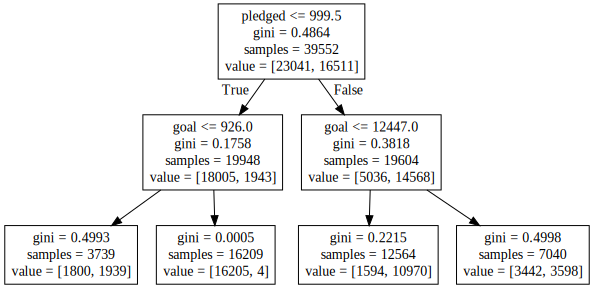

In [81]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(my_decisiontree, out_file=None, feature_names=feature_names))


In [83]:
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
score = accuracy_score(y_test, y_predict)
print(score)


0.9992331288343558
